# Conformalized Early Stopping -- Anomaly Detection

In [1]:
%matplotlib inline

In [2]:
import torch as th
import torch.nn as nn

import numpy as np

from tqdm import tqdm
import torchvision
import matplotlib.pyplot as plt

In [3]:
import sys, os

In [4]:
sys.path.append('C:/Users/16266/OneDrive/Documents/GitHub/Conformalized_early_stopping/ConformalizedES')
sys.path.append('C:/Users/16266/OneDrive/Documents/GitHub/Conformalized_early_stopping/third_party/SPADE-pytorch/src/datasets/')

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
from torchvision import transforms
from mvtec import MVTecDataset

In [6]:
dataset = MVTecDataset(root_path='./data', class_name='hazelnut', is_train=False)

C:\Users\16266\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [7]:
num_workers = 2
test_batch_size = 4

dataset_loader = th.utils.data.DataLoader(dataset, batch_size=test_batch_size,
                                         num_workers=num_workers)


In [8]:
dataiter = iter(dataset_loader)
data = dataiter.next()

In [9]:
images, labels = data[0], data[1]

In [21]:
classes = ['normal', 'defective']

In [19]:
# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                         std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                    transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                         std = [ 1., 1., 1. ]),
                                   ])

    img = invTrans(img)
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

 defective  defective  defective  defective


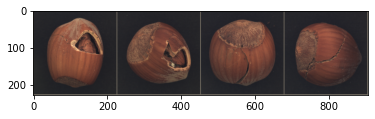

In [22]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))